## 1. Gather

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
predict = pd.read_csv('image-predictions.tsv', sep = '\t')

In [4]:
list_of_dict = []
with open('tweet-json.txt') as f:
    for line in f:
        dic = json.loads(line)
        new_dic = {}
        new_dic = {key: dic[key] for key in dic if key in ['id', 'favorite_count', 'retweet_count']}
        list_of_dict.append(new_dic)
count = pd.DataFrame(list_of_dict)

## 2. Assess

In [5]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
sum(twitter.duplicated())

0

Searched from the web. Meaning of some columns
1. in_reply_to_status_id: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.
2. in_reply_to_user_id:　If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID.
3. retweeted_status_id:  ID of the original tweet.
4. retweeted_status_user_id: User of the original tweet
5. retweeted_status_timestamp: retweeted time

In [8]:
# source: Utility used to post the Tweet, as an HTML-formatted string.
twitter['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [9]:
twitter['expanded_urls'].isna().sum()

59

In [10]:
twitter['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Toby           7
Bailey         7
an             7
Daisy          7
Dave           6
Leo            6
Rusty          6
Jax            6
Oscar          6
Scout          6
Jack           6
Milo           6
Bella          6
Koda           6
Stanley        6
Chester        5
            ... 
Hector         1
Arnold         1
Tayzie         1
Mo             1
Nugget         1
Scruffers      1
Ben            1
Beebop         1
Beemo          1
Snoop          1
Lassie         1
Evy            1
Thor           1
O              1
Callie         1
Harnold        1
Sunshine       1
Bayley         1
Kallie         1
Antony         1
Bruno          1
Maxwell        1
Smiley         1
Marlee         1
Terrenth       1
Danny          1
Mason          1
Ralpher       

In [11]:
sum(twitter['doggo']!='None')

97

In [12]:
sum(twitter['floofer']!='None')

10

In [13]:
sum(twitter['pupper']!='None')

257

In [14]:
sum(twitter['puppo']!='None')

30

`twitter` table

**quality**
1. 'expanded_urls' has 59 missing values.
2. 'source' be extracted from html tags.
3. 'name' with value 'a', 'an' and 'the' is not their name.
4. 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' convert from float to int.
5. 'timestamp' and 'retweeted_status_timestamp' convert from Object(string) to datetime

**tidiness**
1. doggo, floofer, pupper, puppo generalized to a column 'dog_type'

In [15]:
predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
((predict['p1_conf'] > predict['p2_conf']) & (predict['p2_conf'] > predict['p3_conf']) == True).all()

True

In [17]:
(predict['p1_dog'] == True).sum()

1532

In [18]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
sum(predict.duplicated())

0

`predict` table

**observation**
1. predict has only 2075 rows, less than twitter (2356)
2. p1_conf represents the most possible predicted confidence
3. base on p1_dog, 1532 of predict are dogs.

In [20]:
count

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


In [21]:
(count['favorite_count'] > count['retweet_count']).sum()

2175

In [22]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
sum(count.duplicated())

0

`count` table

**observation**
1. count has 2354 rows, a little less than twitter(2356).
2. Most rows(2175) in count has larger favorite_count.

**tidiness**
1. count table cannot stand alone, it belongs to each tweet. Should merge back to table tweet.

## 3. Clean 

In [24]:
twitter_clean = twitter.copy()
predict_clean = predict.copy()
count_clean = count.copy()

### Missing Data

We don't have extra data sources to supplement missing data. So we will skip this section.

### Tideness

#### 1. Columns doggo, floofer, pupper, puppo in table `twitter` all imply the meaning 'dog_type'

##### Define
Generalize doggo, floofer, pupper, puppo columns into a 'dog_type' column. Drop the original 4 columns.

##### Code

In [25]:
twitter_clean['dog_type'] = None
cnt = 0
dog_type_column = ['doggo', 'floofer', 'pupper', 'puppo']
for i, row in twitter_clean.iterrows():
     for column in dog_type_column:
            if row[column] != 'None':
                cnt += 1
                twitter_clean.at[i,'dog_type'] = column
                break
     
print(cnt)

380


In [26]:
twitter_clean.drop(dog_type_column, axis=1, inplace = True)

##### Test

In [27]:
twitter_clean[ twitter_clean['dog_type'].notnull() ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,floofer
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,pupper
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,pupper
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,puppo
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,pupper


#### 2. Each row in count_clean does not form a table. 

##### Define
Merge table count_clean into twitter_clean base on tweet_id and id.

##### Code

In [28]:
count_clean.rename(columns={"id": "tweet_id"}, inplace=True)
count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [29]:
twitter_clean = pd.merge(twitter_clean, count_clean, on='tweet_id', how='left')

##### Test

In [30]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048.0,9774.0


In [31]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_type                      380 non-null object
favorite_count                2354 non-null float64
retweet_count                 2354 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


### Quality

#### 1. 'source'  in twitter are wrapped around html tags.

##### Define
Extract value between tags in twitter's 'source' column.

##### Code

In [32]:
twitter_clean['source'] = twitter_clean['source'].str.extract('.+>(.+)<.+')

##### Test

In [33]:
twitter_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### 2. 'name' with value 'a', 'an' and 'the' is not their name.

##### Define
Convert 'a', 'an', 'the' in 'name' of twitter to None.

##### Code

In [34]:
def convert_to_None(val):
    if val in ['a', 'an', 'the']:
        return None
    else:
        return val
twitter_clean.name = twitter_clean.name.apply(convert_to_None)

##### Test

In [35]:
sum(twitter_clean['name'] == 'a')

0

In [36]:
sum(twitter_clean['name'] == 'an')

0

In [37]:
sum(twitter_clean['name'] == 'the')

0

#### 3. 'timestamp' in twitter type not correct
#### 4. 'retweeted_status_timestamp' in twitter type not correct

##### Define
Convert 'timestamp' and 'retweeted_status_timestamp' in twitter from Object(string) to datetime.

##### Code

In [38]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

In [39]:
twitter_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_clean['retweeted_status_timestamp'])

##### Test

In [40]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2286 non-null object
dog_type                      380 non-null object
favorite_count                2354 non-null float64
retweet_count                 2354 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(3), object(5)
memory 

#### 5. 'in_reply_to_status_id' in twitter type not correct.
#### 6. 'in_reply_to_user_id' in twitter type not correct.
#### 7. 'retweeted_status_id' in twitter type not correct.
#### 8. 'retweeted_status_user_id' in twitter type not correct.

##### Define
Convert  'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' in twitter from float to int. Fill NA/NaN values with 0.

In [41]:
twitter_clean['in_reply_to_status_id'].fillna(0, inplace=True)
twitter_clean['in_reply_to_status_id'] = twitter_clean['in_reply_to_status_id'].astype(int)

In [42]:
twitter_clean['in_reply_to_user_id'].fillna(0, inplace=True)
twitter_clean['in_reply_to_user_id'] = twitter_clean['in_reply_to_user_id'].astype(int)

In [43]:
twitter_clean['retweeted_status_id'].fillna(0, inplace=True)
twitter_clean['retweeted_status_id'] = twitter_clean['retweeted_status_id'].astype(int)

In [44]:
twitter_clean['retweeted_status_user_id'].fillna(0, inplace=True)
twitter_clean['retweeted_status_user_id'] = twitter_clean['retweeted_status_user_id'].astype(int)

##### Test

In [45]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2286 non-null object
dog_type                      380 non-null object
favorite_count                2354 non-null float64
retweet_count                 2354 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(7), object(5)
memory us

## 4. Store

In [46]:
twitter_clean.to_csv('twitter_archive_master.csv')

In [47]:
predict_clean.to_csv('predict_archive_master.csv')

## 5. Analyze

#### a. Analyze the distribution of rating. 

In [48]:
twitter_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Draw the histogram of rating_numerator under the codition rating_denominator equals 10(indicating the same standard).             

In [49]:
twitter_clean[ twitter_clean['rating_denominator']==10 ]['rating_numerator'].value_counts()

12      558
11      463
10      461
13      351
9       156
8       102
14       54
7        54
5        37
6        32
3        19
4        15
2         9
1         8
75        2
0         2
420       2
15        2
26        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

The histogram indicates outliers exist. Use boxplot to verify.

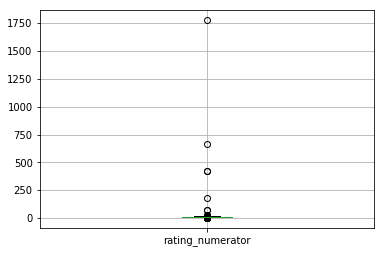

In [50]:
twitter_clean[ twitter_clean['rating_denominator']==10 ].boxplot('rating_numerator');

We should draw the distribution of the numerator excluding outliers(less than or equal Q3+1.5*IQR).

In [51]:
numerator = twitter_clean[ twitter_clean['rating_denominator']==10 ]['rating_numerator']
Q1 = numerator.quantile(0.25)
Q3 = numerator.quantile(0.75)
IQR = Q3 - Q1

In [52]:
filter_numerator = numerator[ numerator <= (Q3 + 1.5*IQR) ]

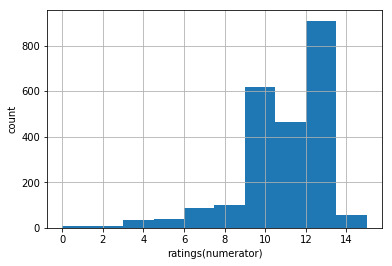

In [53]:
plt.hist(filter_numerator);
plt.xlabel('ratings(numerator)')
plt.ylabel('count')
plt.grid()

The histogram indicates most rating of numerator are in the range of 9 to 13.

In [54]:
filter_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
7      54
14     54
5      37
6      32
3      19
4      15
2       9
1       8
15      2
0       2
Name: rating_numerator, dtype: int64

#### b. Draw scatter diagram of favorite count and retweet count to see if there is connections.

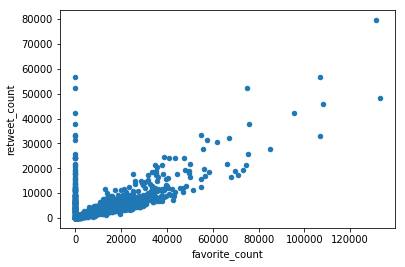

In [55]:
twitter_clean.plot.scatter(x='favorite_count', y='retweet_count');

The scatter shows that favorite_count and retweet_count have positive correlation. 
For favorite_count equals zero, there exist several retweet_counts, ranging from 0 ~ nearly 6000. This shows that users tend to retweet more than favorite tweets.

#### c. Check the relationship between tweet and predict.

Connect two dataframes by the column 'tweet_id'.

In [56]:
merge = pd.merge(twitter_clean, predict_clean, on='tweet_id', how = 'inner')

In [57]:
merge.shape

(2075, 27)

In [58]:
merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,0,0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,0,0,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,0,0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,0,0,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,0,0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,0,0,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,0,0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,0,0,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,0,0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,0,0,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [59]:
sum(merge['dog_type'].notnull() & (merge['p1_dog'] == True))

237

In [60]:
sum(merge['dog_type'].notnull())

321

In [61]:
sum(merge['dog_type'].notnull() & (merge['p1_dog'] == True)) / sum(merge['dog_type'].notnull())

0.7383177570093458

The accuracy of predicting dogs is 73.8%.

#### d. Analyze sources of tweets.

In [62]:
twitter_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [63]:
counts = twitter_clean['source'].value_counts(normalize=True)
value = counts * 100
percent = value.round(1)

In [64]:
label = twitter_clean['source'].value_counts().index.tolist()
label_percent = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(label, percent)]

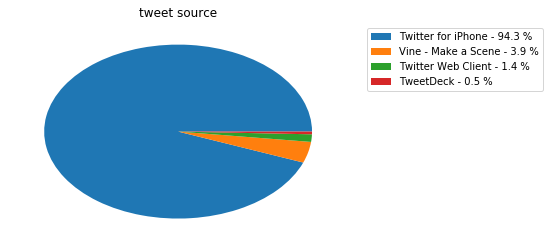

In [65]:
plt.pie(percent)
plt.legend(label_percent,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('tweet source')
plt.show()

The pie chart shows more than 90% of tweets were from iPhone.